<a href="https://colab.research.google.com/github/stirlitzzz/markov_switching_demo/blob/main/markov_switching_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def GenerateMixedSignal(num_points,switch_point,mu1,sigma1,mu2,sigma2):
    x1 = sm.tsa.arma_generate_sample([1], [1], num_points)
    x2 = sm.tsa.arma_generate_sample([1], [1], num_points)

    signal1=x1*sigma1+mu1
    signal2=x2*sigma2+mu2

    signal_switch=signal1.copy()
    signal_switch[switch_point:]=signal2[switch_point:]
    return((signal_switch,signal1,signal2))

In [ ]:
def ReadInputParams():
    mu1=w_mu1.value
    mu2=w_mu2.value

    sigma1=w_sigma1.value
    sigma2=w_sigma2.value
    num_points=w_numpoints.value
    switch_point=w_switch_point.value
    window_size=w_window_size.value
return(mu1,mu2,sigma1,sigma2,num_points,switch_point)

Create the input forms
https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [50]:
import ipywidgets as widgets
slider1 = widgets.IntSlider(value=5, max=10)
slider2 = widgets.IntSlider(value=5, max=10)
widgets.VBox([slider1, slider2])
#display(slider)
w_mu1=widgets.FloatText(
    value=0,
    disabled=False
)
w_mu2=widgets.FloatText(
    value=0,
    disabled=False
)

w_sigma1=widgets.FloatText(
    value=.4,
    disabled=False
)
w_sigma2=widgets.FloatText(
    value=.15,
    disabled=False
)

w_window_size=widgets.IntText(
    value=10,
    disabled=False
)
w_numpoints=widgets.IntText(
    value=100,
    disabled=False
)
w_switch_point=widgets.IntText(
    value=50,
    disabled=False
)


items = [widgets.Label(value=""), widgets.Label(value="Regime 1"), widgets.Label(value="Regime 2"),widgets.Label(value="Mean"), w_mu1, w_mu2,widgets.Label(value="$$sigma$$"), w_sigma1,w_sigma2]
w_gb1=widgets.GridBox(items, layout=widgets.Layout(grid_template_columns="repeat(3, 100px)"))

items2=[widgets.Label(value=x) for x in ["Num Point",  "Switch Point","Window Size"]]+[w_numpoints, w_switch_point, w_window_size]
w_gb2=widgets.GridBox(items2,layout=widgets.Layout(grid_template_columns="repeat(3, 100px)"))
widgets.VBox([w_gb1,w_gb2])





Generate 2 regime synthetic data

In [57]:
(mu1,mu2,sigma1,sigma2,num_points,switch_point,window_size)=[x.value for x in [w_mu1,w_mu2,w_sigma1,w_sigma2,w_numpoints,w_switch_point,w_window_size]]
(signal_switch, signal1,signal2)=GenerateMixedSignal(num_points,switch_point,mu1,sigma1,mu2,sigma2)

Plot the synthetic signal

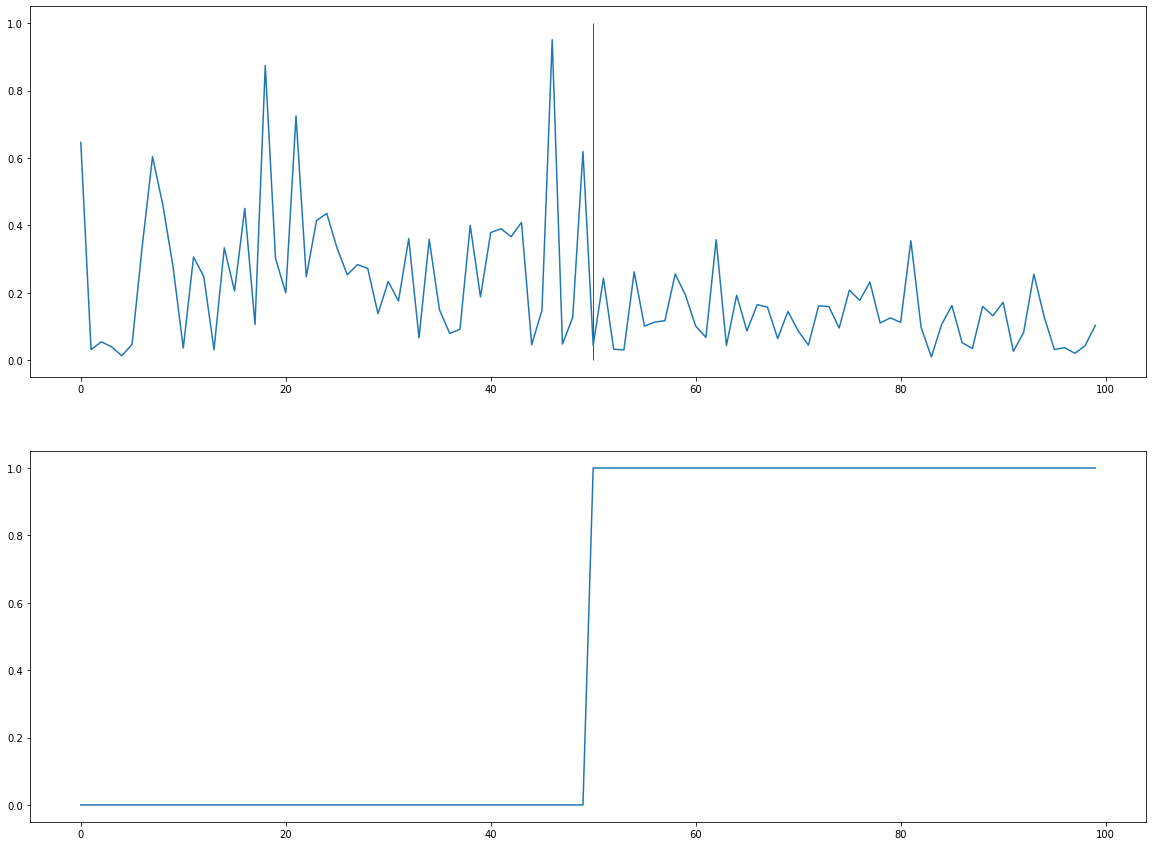

In [58]:
fig, axes = plt.subplots(2, figsize=(20, 15))
ax = axes[0]

ax.plot(range(0,num_points),np.sqrt(signal_switch**2))
ax.fill_between(range(0,num_points), 0, 1, where=[x==switch_point for x in range(0,num_points)], color="g", alpha=1)

ax = axes[1]
regime_indicator_true=np.zeros(num_points)
regime_indicator_true[switch_point:]=1
regime_indicator_true
ax.plot(regime_indicator_true)




$$Punc_{ij}$$ <--unconditional probability at time *i* of regime *j*